In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Copy datasets
!cp /content/drive/MyDrive/CNNs/project_speech/train.zip .

In [3]:
!unzip -q '/content/train.zip'

In [4]:
import os

# Define the paths to the directories
angry_dir = "/content/train/angry"
disgust_dir = "/content/train/disgust"
fear_dir = "/content/train/fear"
happy_dir = "/content/train/happy"
neutral_dir = "/content/train/neutral"
sad_dir = "/content/train/sad"

# Use the os module to count the number of files in each directory
angry_count = len(os.listdir(angry_dir))
disgust_count = len(os.listdir(disgust_dir))
fear_count = len(os.listdir(fear_dir))
happy_count = len(os.listdir(happy_dir))
neutral_count = len(os.listdir(neutral_dir))
sad_count = len(os.listdir(sad_dir))

# Print the results
print(f"Number of files in {angry_dir}: {angry_count}")
print(f"Number of files in {disgust_dir}: {disgust_count}")
print(f"Number of files in {fear_dir}: {fear_count}")
print(f"Number of files in {happy_dir}: {happy_count}")
print(f"Number of files in {neutral_dir}: {neutral_count}")
print(f"Number of files in {sad_dir}: {sad_count}")

Number of files in /content/train/angry: 1271
Number of files in /content/train/disgust: 1271
Number of files in /content/train/fear: 1271
Number of files in /content/train/happy: 1271
Number of files in /content/train/neutral: 1087
Number of files in /content/train/sad: 1271


In [5]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define augmentation parameters
datagen_rotation_45 = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_rotation_135 = ImageDataGenerator(
    rotation_range=135,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_zoom_10 = ImageDataGenerator(
    rotation_range=0,  # No rotation for zoom augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# โฟลเดอร์ที่มีภาพต้นฉบับตามแต่ละคลาส
original_images_dir = "/content/train"
# โฟลเดอร์ที่จะเก็บภาพที่ถูก augment
augmented_images_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment"

# ตรวจสอบว่าโฟลเดอร์สำหรับภาพที่ถูก augment มีหรือยัง ถ้าไม่มีให้สร้างโฟลเดอร์
if not os.path.exists(augmented_images_dir):
    os.makedirs(augmented_images_dir)

# ลูปผ่านโฟลเดอร์ของแต่ละคลาส
class_folders = os.listdir(original_images_dir)
target_augmentation_count = 5  # จำนวนการ augment ต่อภาพต้นฉบับ

for class_folder in class_folders:
    class_folder_path = os.path.join(original_images_dir, class_folder)
    class_augmented_dir = os.path.join(augmented_images_dir, class_folder)

    # Create subfolders for each type of augmentation
    rotation_45_dir = os.path.join(class_augmented_dir, 'rotation_45')
    rotation_135_dir = os.path.join(class_augmented_dir, 'rotation_135')
    zoom_10_dir = os.path.join(class_augmented_dir, 'zoom_10')

    for aug_dir in [rotation_45_dir, rotation_135_dir, zoom_10_dir]:
        if not os.path.exists(aug_dir):
            os.makedirs(aug_dir)

    images_list = os.listdir(class_folder_path)

    selected_images = random.sample(images_list, 35)

    for selected_image_name in selected_images:
        selected_image_path = os.path.join(class_folder_path, selected_image_name)
        image = tf.keras.preprocessing.image.load_img(selected_image_path)
        x = tf.keras.preprocessing.image.img_to_array(image)
        x = x.reshape((1,) + x.shape)

        i = 0

        # Augmentation with rotation 45
        for batch in datagen_rotation_45.flow(x, batch_size=1, save_to_dir=rotation_45_dir, save_prefix='aug', save_format='jpg'):
            augmented_image = tf.keras.preprocessing.image.array_to_img(batch[0])

            # แสดงภาพที่ถูก augment
            plt.imshow(augmented_image)
            plt.axis('off')  # ปิดแกน x และ y
            plt.show()

            i += 1
            if i >= target_augmentation_count:  # สร้างภาพที่ augment ได้ตามจำนวนที่ต้องการ
                break

        # Augmentation with rotation 135
        for batch in datagen_rotation_135.flow(x, batch_size=1, save_to_dir=rotation_135_dir, save_prefix='aug', save_format='jpg'):
            augmented_image = tf.keras.preprocessing.image.array_to_img(batch[0])

            # แสดงภาพที่ถูก augment
            plt.imshow(augmented_image)
            plt.axis('off')  # ปิดแกน x และ y
            plt.show()

            i += 1
            if i >= target_augmentation_count:  # สร้างภาพที่ augment ได้ตามจำนวนที่ต้องการ
                break

        # Augmentation with zoom 10%
        for batch in datagen_zoom_10.flow(x, batch_size=1, save_to_dir=zoom_10_dir, save_prefix='aug', save_format='jpg'):
            augmented_image = tf.keras.preprocessing.image.array_to_img(batch[0])

            # แสดงภาพที่ถูก augment
            plt.imshow(augmented_image)
            plt.axis('off')  # ปิดแกน x และ y
            plt.show()

            i += 1
            if i >= target_augmentation_count:  # สร้างภาพที่ augment ได้ตามจำนวนที่ต้องการ
                break


Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Count data
import os

# Define the paths to the directories
angry_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment/angry"
disgust_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment/disgust"
fear_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment/fear"
happy_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment/happy"
neutral_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment/neutral"
sad_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment/sad"

# Use the os module to count the number of files in each directory
angry_count = len(os.listdir(angry_dir))
disgust_count = len(os.listdir(disgust_dir))
fear_count = len(os.listdir(fear_dir))
happy_count = len(os.listdir(happy_dir))
neutral_count = len(os.listdir(neutral_dir))
sad_count = len(os.listdir(sad_dir))

# Print the results
print(f"Number of files in {angry_dir}: {angry_count}")
print(f"Number of files in {disgust_dir}: {disgust_count}")
print(f"Number of files in {fear_dir}: {fear_count}")
print(f"Number of files in {happy_dir}: {happy_count}")
print(f"Number of files in {neutral_dir}: {neutral_count}")
print(f"Number of files in {sad_dir}: {sad_count}")


Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/angry: 3
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/disgust: 3
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/fear: 3
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/happy: 3
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/neutral: 3
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/sad: 3


In [7]:
import os

def count_files_in_directory(directory):
    return len(os.listdir(directory))

# Define the paths to the directories
base_dir = "/content/drive/MyDrive/CNNs/project_speech/image_augment"

# Define the subdirectories
subdirectories = ['rotation_45', 'rotation_135', 'zoom_10']

# Define the emotions
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

# Loop through each emotion and each subdirectory
for emotion in emotions:
    for subdir in subdirectories:
        # Construct the path to the current directory
        current_dir = os.path.join(base_dir, emotion, subdir)

        # Use the count_files_in_directory function to count the number of files
        file_count = count_files_in_directory(current_dir)

        # Print the results
        print(f"Number of files in {current_dir}: {file_count}")


Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/angry/rotation_45: 174
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/angry/rotation_135: 35
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/angry/zoom_10: 35
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/disgust/rotation_45: 172
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/disgust/rotation_135: 35
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/disgust/zoom_10: 35
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/fear/rotation_45: 174
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/fear/rotation_135: 35
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/fear/zoom_10: 35
Number of files in /content/drive/MyDrive/CNNs/project_speech/image_augment/happy/rotation_45: 173
Number of files in /co

In [25]:
import matplotlib.pyplot as plt

# ...

# Loop through class folders
for class_folder in class_folders:
    # ...

    # Loop through augmentation types
    for aug_dir in [rotation_45_dir, rotation_135_dir, zoom_10_dir]:
        # ...

        # Display a sample of augmented images
        sample_images = os.listdir(aug_dir)[:4]  # Display the first 4 images
        plt.figure(figsize=(12, 3))  # Adjust the figure size as needed

        for i, img_name in enumerate(sample_images):
            img_path = os.path.join(aug_dir, img_name)
            img = plt.imread(img_path)

            plt.subplot(1, 4, i + 1)
            plt.imshow(img)
            plt.axis('off')

        plt.show()


Output hidden; open in https://colab.research.google.com to view.

### show sample rotation 45

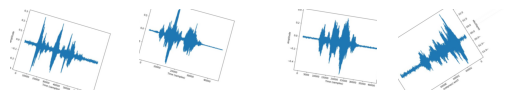

In [26]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Rest of your code...

# Sample images for rotation 45
sample_class = class_folders[0]  # Assuming you want to use the first class for the example
sample_class_path = os.path.join(original_images_dir, sample_class)
sample_images_list = os.listdir(sample_class_path)
sample_selected_images = random.sample(sample_images_list, 4)  # Select 4 random images

for selected_image_name in sample_selected_images:
    selected_image_path = os.path.join(sample_class_path, selected_image_name)
    image = tf.keras.preprocessing.image.load_img(selected_image_path)
    x = tf.keras.preprocessing.image.img_to_array(image)
    x = x.reshape((1,) + x.shape)

    # Augmentation with rotation 45
    for batch in datagen_rotation_45.flow(x, batch_size=1, save_to_dir=None, save_prefix='aug', save_format='jpg'):
        augmented_image = tf.keras.preprocessing.image.array_to_img(batch[0])

        # Display the augmented image
        plt.subplot(1, 4, sample_selected_images.index(selected_image_name) + 1)
        plt.imshow(augmented_image)
        plt.axis('off')  # Turn off axis labels
        break  # Only display one augmented image for each original image

plt.show()


### show sample rotation 135

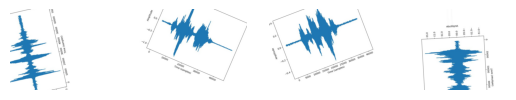

In [27]:
# Assuming you have already defined the necessary variables and functions

# Sample images for rotation 135
for selected_image_name in sample_selected_images:
    selected_image_path = os.path.join(sample_class_path, selected_image_name)
    image = tf.keras.preprocessing.image.load_img(selected_image_path)
    x = tf.keras.preprocessing.image.img_to_array(image)
    x = x.reshape((1,) + x.shape)

    # Augmentation with rotation 135
    for batch in datagen_rotation_135.flow(x, batch_size=1, save_to_dir=None, save_prefix='aug', save_format='jpg'):
        augmented_image = tf.keras.preprocessing.image.array_to_img(batch[0])

        # Display the augmented image
        plt.subplot(1, 4, sample_selected_images.index(selected_image_name) + 1)
        plt.imshow(augmented_image)
        plt.axis('off')  # Turn off axis labels
        break  # Only display one augmented image for each original image

plt.show()


### show sample zoom 10

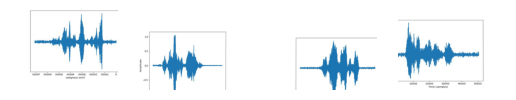

In [28]:
# Assuming you have already defined the necessary variables and functions

# Sample images for zoom 10
for selected_image_name in sample_selected_images:
    selected_image_path = os.path.join(sample_class_path, selected_image_name)
    image = tf.keras.preprocessing.image.load_img(selected_image_path)
    x = tf.keras.preprocessing.image.img_to_array(image)
    x = x.reshape((1,) + x.shape)

    # Augmentation with zoom 10
    for batch in datagen_zoom_10.flow(x, batch_size=1, save_to_dir=None, save_prefix='aug', save_format='jpg'):
        augmented_image = tf.keras.preprocessing.image.array_to_img(batch[0])

        # Display the augmented image
        plt.subplot(1, 4, sample_selected_images.index(selected_image_name) + 1)
        plt.imshow(augmented_image)
        plt.axis('off')  # Turn off axis labels
        break  # Only display one augmented image for each original image

plt.show()
